In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-reviews-dataset/reviews_data.csv


STAR-BUCKS

In [66]:
star_data= pd.read_csv('/kaggle/input/starbucks-reviews-dataset/reviews_data.csv')
star_data.head()

,name,location,Date,Rating,Review,Image_Links
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",5.0,Amber and LaDonna at the Starbucks on Southwes...,['No Images']
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",5.0,** at the Starbucks by the fire station on 436...,['No Images']
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",5.0,I just wanted to go out of my way to recognize...,['https://media.consumeraffairs.com/files/cach...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",5.0,Me and my friend were at Starbucks and my card...,['No Images']
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",5.0,I’m on this kick of drinking 5 cups of warm wa...,['https://media.consumeraffairs.com/files/cach...


**Goal is to analyze the data-set and determine the states with the best and worst starbucks for the launch of a new product.

In [67]:
star_data.columns

Index(['name', 'location', 'Date', 'Rating', 'Review', 'Image_Links'], dtype='object')

In [68]:
star_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         850 non-null    object 
 1   location     850 non-null    object 
 2   Date         850 non-null    object 
 3   Rating       705 non-null    float64
 4   Review       850 non-null    object 
 5   Image_Links  850 non-null    object 
dtypes: float64(1), object(5)
memory usage: 40.0+ KB


In [70]:
#checking how many null values there are in the Rating column
star_data.Rating.isnull().sum()
#star_data[star_data.Rating.isnull()]['Rating'].head()

145

In [72]:
#there are 145 null Ratings; i will drop those rows as they wont be needed for the analysis
star_data = star_data[star_data['Rating'].notnull()]
star_data.Rating.isnull().sum()

0

Successfully removed the null ratings.

In [73]:
star_data['Rating'].head()

0    5.0
1    5.0
2    5.0
3    5.0
4    5.0
Name: Rating, dtype: float64

In [74]:
def ext_state(row):#function to extract state
    state = row['location'].split(',')[-1].lstrip()
    return state
star_data['state']=star_data.apply(ext_state,axis=1)

/tmp/ipykernel_33/2163928108.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_data['state']=star_data.apply(ext_state,axis=1)


In [75]:
star_data['state'].value_counts(normalize=True)*100

state
CA           19.716312
FL            5.815603
Other         5.531915
TX            4.964539
WA            4.822695
               ...    
ME            0.141844
Minnesota     0.141844
Florida       0.141844
Alberta       0.141844
oh            0.141844
Name: proportion, Length: 81, dtype: float64

The majority of the reviews are from CA.

In [76]:
star_data[star_data['state']=='CA']['Rating'].value_counts()

Rating
1.0    86
2.0    25
4.0    11
5.0     9
3.0     8
Name: count, dtype: int64

In [77]:
star_data.groupby('state')['Rating'].size().sort_values(ascending=False).head(10)

state
CA       139
FL        41
Other     39
TX        35
WA        34
NY        31
NC        23
GA        23
AZ        22
IL        21
Name: Rating, dtype: int64

There are 139 ratings from CA. with 86 and 25 for 1 and 2 stars respectively

Further analysis on the percentage of 1 and 2 stars from CA

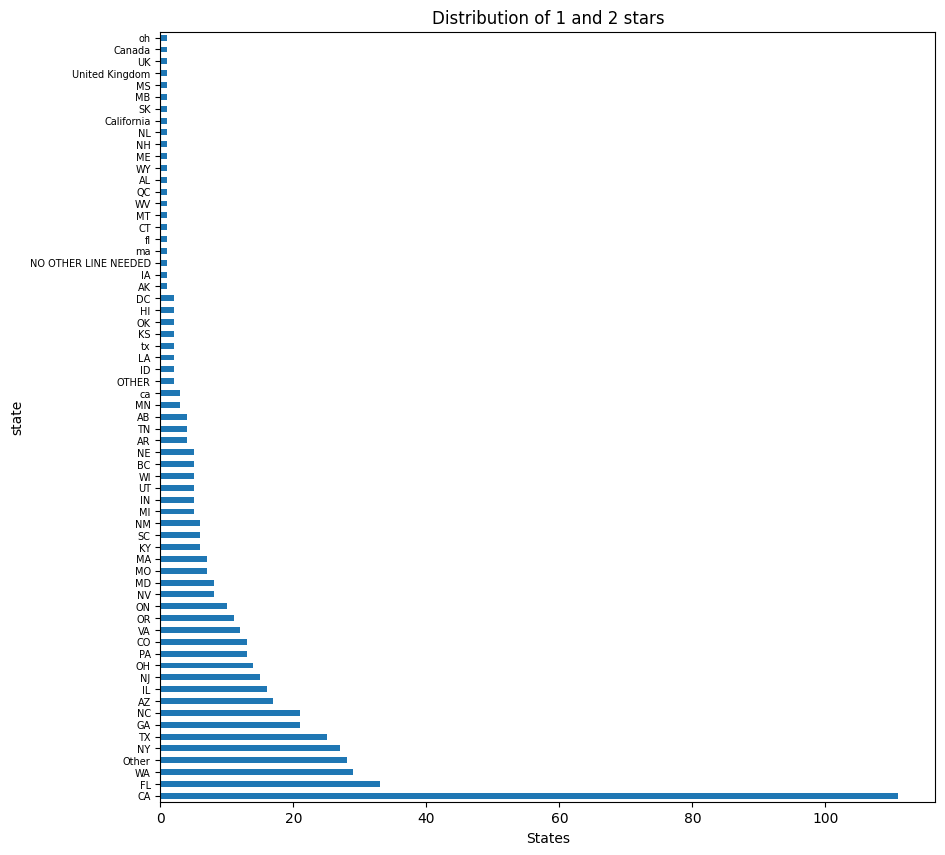

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
star_data[(star_data['Rating']==1.0)|(star_data['Rating']==2.0)]['state'].value_counts().plot.barh(title='Distribution of 1 and 2 stars'
                                                                                                )
plt.xlabel('States')
plt.yticks(fontsize=7)
plt.show()

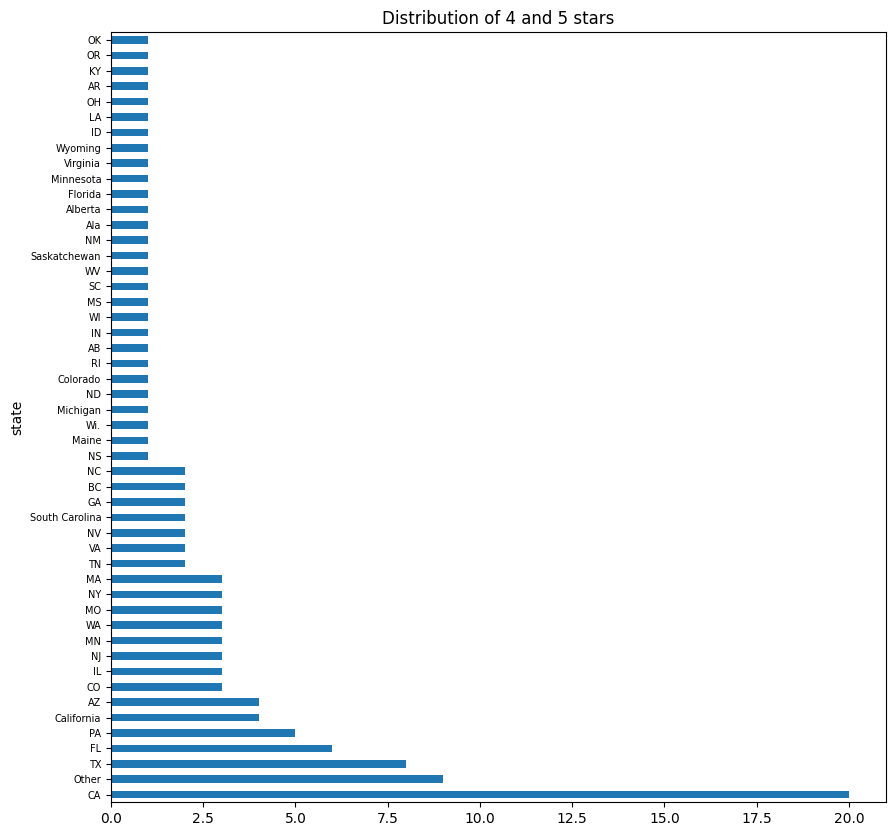

In [79]:
plt.figure(figsize=(10,10))
star_data[(star_data['Rating']==5.0)|(star_data['Rating']==4.0)]['state'].value_counts().plot.barh(title='Distribution of 4 and 5 stars'
                                                                                                )
plt.yticks(fontsize=7)
plt.show()

Though CA has the most 1 and 2 stars, it also has the most 5 and 4 stars. 

In [80]:
star_data.groupby('state')['Rating'].value_counts(normalize=True).sort_values(ascending=False).iloc[-50:].head(50)*100

state  Rating
WI     5.0       14.285714
       3.0       14.285714
IN     3.0       14.285714
       5.0       14.285714
WI     2.0       14.285714
NM     5.0       14.285714
GA     2.0       13.043478
NY     2.0       12.903226
CO     5.0       12.500000
TX     2.0       11.428571
NJ     5.0       11.111111
PA     2.0       11.111111
       4.0       11.111111
NV     4.0       10.000000
MO     5.0       10.000000
NV     5.0       10.000000
MA     5.0       10.000000
FL     5.0        9.756098
NY     5.0        9.677419
IL     2.0        9.523810
       3.0        9.523810
       5.0        9.523810
AZ     2.0        9.090909
WA     5.0        8.823529
NC     5.0        8.695652
GA     5.0        8.695652
CA     4.0        7.913669
Other  4.0        7.692308
VA     3.0        6.666667
       5.0        6.666667
       4.0        6.666667
CA     5.0        6.474820
OH     3.0        6.250000
       5.0        6.250000
OR     5.0        6.250000
CO     4.0        6.250000
OR     2.0    

6.47, 7.91 and 5.755 are the percentages of 5.0, 4.0 and 3.0 review ratings from the total 138 from CA; California.

Now i need to check how many cities came from each state; this will help to narrow down the best cities for the launch.

In [81]:
star_data['city'] = star_data['location'].apply(lambda a: a.split(',')[0].strip())

/tmp/ipykernel_33/588287361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  star_data['city'] = star_data['location'].apply(lambda a: a.split(',')[0].strip())


In [82]:
#creating frequency table for cities
cities = star_data['city'].unique()
state_city={}#state and number of cities
states = star_data['state'].unique()
for city in cities:
        state2 = star_data[star_data['city']==city]['state'].iloc[0]
        if state2 in state_city:
            state_city[state2]+=1
        elif state2 not in state_city:  
            state_city[state2]=1

In [83]:
state_city

{'TX': 26,
 'FL': 27,
 'PA': 16,
 'WA': 16,
 'OR': 9,
 'NC': 16,
 'MD': 8,
 'Other': 31,
 'CA': 99,
 'OH': 11,
 'HI': 3,
 'NJ': 17,
 'GA': 18,
 'DC': 1,
 'AZ': 13,
 'MA': 7,
 'VA': 13,
 'NV': 4,
 'TN': 6,
 'IA': 1,
 'WI': 7,
 'NH': 1,
 'AR': 3,
 'MN': 3,
 'IN': 7,
 'MO': 7,
 'IL': 13,
 'MI': 5,
 'MS': 1,
 'CO': 9,
 'OK': 3,
 'UT': 5,
 'KY': 6,
 'ME': 1,
 'KS': 2,
 'BC': 7,
 'NY': 17,
 'NE': 2,
 'AK': 1,
 'AB': 4,
 'ID': 3,
 'Canada': 1,
 'LA': 4,
 'United Kingdom': 1,
 'SC': 5,
 'MB': 1,
 'SK': 1,
 'ON': 6,
 'Virginia': 1,
 'Saskatchewan': 1,
 'South Carolina': 2,
 'California': 4,
 'NL': 1,
 'NM': 3,
 'Minnesota': 1,
 'Florida': 1,
 'Alberta': 1,
 'Ala': 1,
 'WV': 2,
 'Wi.': 1,
 'Maine': 1,
 'New York': 1,
 'NS': 1,
 'ND': 1,
 'Colorado': 1,
 'RI': 1,
 'Michigan': 1,
 'WY': 1,
 'AL': 1,
 'QC': 1,
 'MT': 1,
 'CT': 1,
 'ca': 2,
 'OTHER': 1,
 'fl': 1,
 'ma': 1,
 'NO OTHER LINE NEEDED': 1,
 'oh': 1}

In [84]:
state_a_city = pd.DataFrame(columns=['state','cities'],index=range(1,len(state_city)+1))

In [85]:
state_a_city['state']=state_city.keys()
state_a_city['cities']=state_city.values()

In [86]:
state_a_city.head()

,state,cities
1,TX,26
2,FL,27
3,PA,16
4,WA,16
5,OR,9


I created a new table to store the states and the number of cities.

In [87]:
state_a_city[['state','cities']].sort_values('cities',ascending=False)

,state,cities
9,CA,99
8,Other,31
2,FL,27
1,TX,26
13,GA,18
...,...,...
53,NL,1
29,MS,1
56,Florida,1
57,Alberta,1


CA; California, has the most cities represented in the reviews; 99.
Initially i found that there were 138 reviews in total from CA. this means 39 states have more than 1 review.
Now we will find those 39 states

In [147]:
from collections import Counter
def mode(group):
    counts = Counter(group)
    max_count = max(counts.values())
    modes = [value for value,count in counts.items() if count == max_count]
    return modes
# Filter the DataFrame to select only rows from California with a rating of 4.0 or 5.0
filtered_data = star_data[(star_data['state'] == 'CA')]

# Group the filtered data by 'city' and count the number of ratings in each city
city_ratings_count = filtered_data.groupby('city')['Rating'].count().reset_index()

# Rename the 'Rating' column to 'Rating_Count'
city_ratings_count = city_ratings_count.rename(columns={'Rating': 'Rating_Count'})
city_ratings_count.sort_values('Rating_Count',ascending=False).head(10)

,city,Rating_Count
49,Los Angeles,9
74,San Diego,4
5,Beverly Hills,4
73,Sacramento,4
53,Modesto,3
57,Oakland,3
31,Fresno,3
92,Vallejo,3
23,Elk Grove,2
25,Encinitas,2


In [148]:
star_data[star_data['city']=='Los Angeles']['Rating']

152    1.0
185    1.0
376    1.0
425    1.0
482    1.0
506    1.0
584    2.0
622    2.0
661    2.0
Name: Rating, dtype: float64

Los Angeles has poor Reviews despite having the most ratings in the state.

In [181]:
state_city_Rcount = star_data.groupby(['state','city'])['Rating'].count().reset_index().sort_values('Rating',ascending=False)
state_city_Rcount.set_index('city',inplace=True)

In [182]:
state_city_Rcount

,state,Rating
city,,
New York,NY,11
Seattle,WA,10
Los Angeles,CA,9
Chicago,IL,8
Denver,CO,6
...,...,...
Denham Springs,LA,1
Barataria,LA,1
Wallins,KY,1


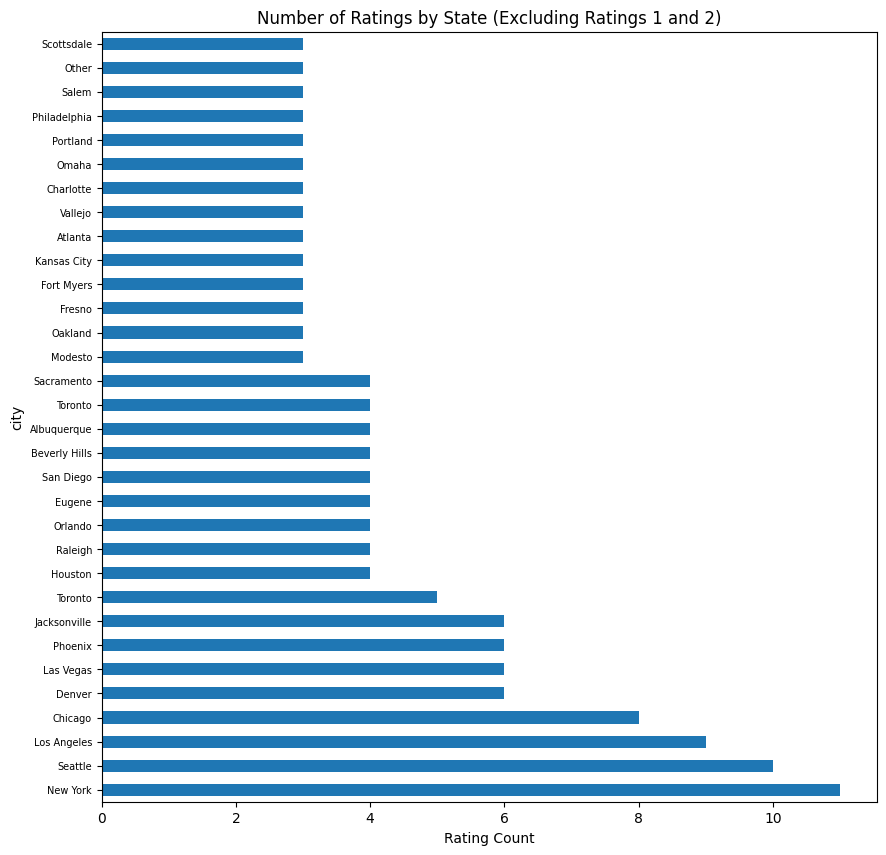

In [183]:
state_city_Rcount[state_city_Rcount['Rating']>2]['Rating'].plot.barh(figsize=(10,10))
plt.yticks(fontsize=7)
plt.xlabel('Rating Count')
plt.title('Number of Ratings by State (Excluding Ratings 1 and 2)')
plt.show()

investigating NY, WA and IL states.

In [211]:
star_data.loc[(star_data['Rating'].isin([5.0,4.0])),['city','Rating']].groupby('city')['Rating'].count().reset_index().sort_values('Rating',ascending=False)

,city,Rating
49,Jacksonville,3
99,Seattle,3
83,Phoenix,2
0,Aberdeen,1
74,Newnan,1
...,...,...
34,Escondido,1
33,Englewood,1
32,Encinitas,1
31,Desert Hot Springs,1


The City of Seattle has the most 5 and 4 stars.

California has the most engagement so i would recommend California state for the launch of the new product. then the city of Seattle would be reommended as the best city for the launch.